In [1]:
# ignore future warning
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# processing of text
from preprocessing import Preprocessing

# models
import torch
from model_functions import *
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# inicjalize table for result
result = ''

In [2]:
import time
import torchtext
from torchtext.legacy import data
import re

In [3]:
dataa = Preprocessing()

In [3]:
# data.load_data()
# data.remove_quoting_comments()
# data.demojize()
# data.clean_text()
# data.stopwords_remove()
# data.lemmatize_text()
# data.correct_typo_words()
# data.token_join()
# data.write_to_file()

# Model

In [3]:
data.split_train_val_test(file_name='test_cleaned_data')
data.tfidf_vectorizer()
data.count_vectorizer()

### TFIDF VEctorizer

Results for Random Forest TFIDF:
Random Forest TFIDF accuracy: 0.8292
Random Forest TFIDF f-score: 0.8107
Random Forest TFIDF recall: 0.8292


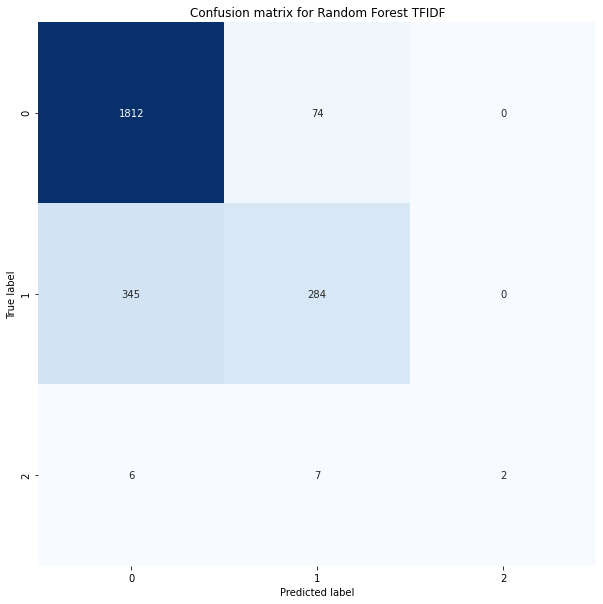

In [5]:
# Random Forest

rf = Modeling(RandomForestClassifier(n_estimators=1000, random_state=0), 
              data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
              'Random Forest TFIDF')
rf.fit_predict()
rf.print_results()
rf.plot_confusion_matrix()
result = rf.add_to_table()

Results for Logistic Regression TFIDF:
Logistic Regression TFIDF accuracy: 0.8352
Logistic Regression TFIDF f-score: 0.8147
Logistic Regression TFIDF recall: 0.8352


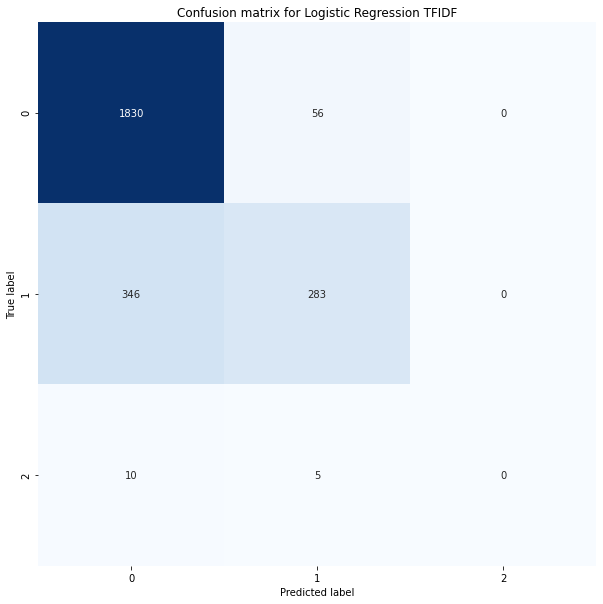

In [6]:
# Logistic Regression

log_reg = Modeling(LogisticRegression(solver='newton-cg'), 
                   data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
                   'Logistic Regression TFIDF')
log_reg.fit_predict()
log_reg.print_results()
log_reg.plot_confusion_matrix()
result = log_reg.add_to_table()

Results for Logistic Regression SMOTE TFIDF:
Logistic Regression SMOTE TFIDF accuracy: 0.834
Logistic Regression SMOTE TFIDF f-score: 0.8156
Logistic Regression SMOTE TFIDF recall: 0.834


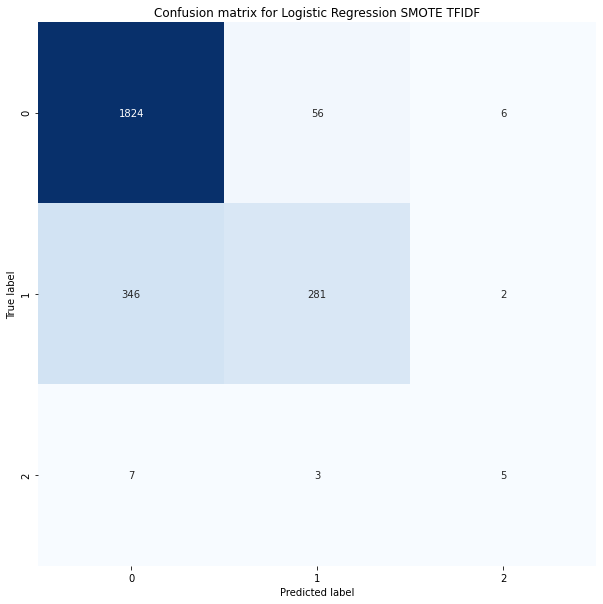

In [7]:
# SMOTE for Logistic Regression

log_reg_smote = Modeling(LogisticRegression(solver='newton-cg'), 
                         data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
                         'Logistic Regression SMOTE TFIDF')
log_reg_smote.sample(SMOTE(sampling_strategy='minority'))
log_reg_smote.fit_predict()
log_reg_smote.print_results()
log_reg_smote.plot_confusion_matrix()
result = log_reg_smote.add_to_table()

Results for SVC TFIDF:
SVC TFIDF accuracy: 0.8206
SVC TFIDF f-score: 0.7918
SVC TFIDF recall: 0.8206


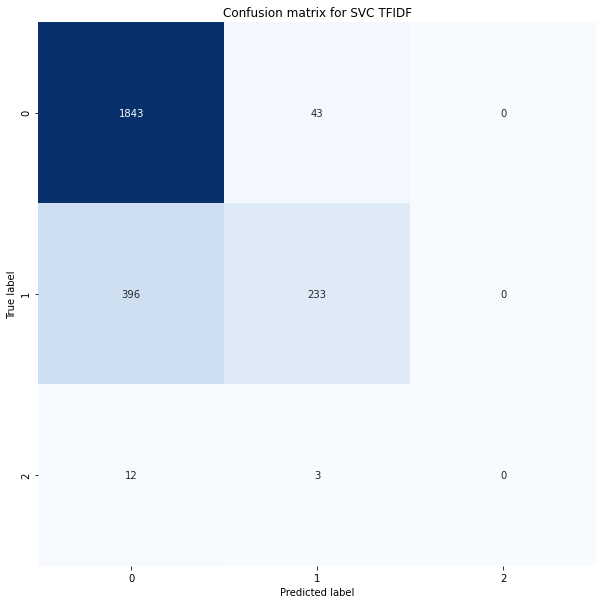

In [8]:
# SVC

svc = Modeling(SVC(probability=True), 
               data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
               'SVC TFIDF')
svc.fit_predict()
svc.print_results()
svc.plot_confusion_matrix()
result = svc.add_to_table()

Results for SVC SMOTE TFIDF:
SVC SMOTE TFIDF accuracy: 0.8162
SVC SMOTE TFIDF f-score: 0.7846
SVC SMOTE TFIDF recall: 0.8162


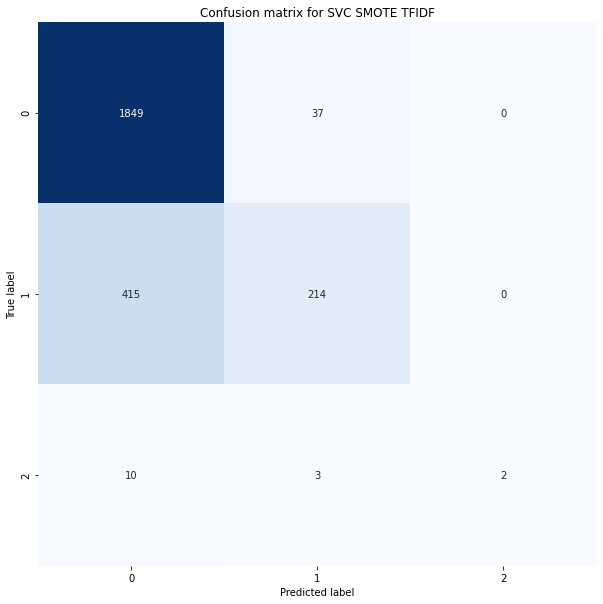

In [9]:
# SMOTE for SVC

svc_smote = Modeling(SVC(probability=True), 
                     data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
                     'SVC SMOTE TFIDF')
svc_smote.sample(SMOTE(sampling_strategy='minority'))
svc_smote.fit_predict()
svc_smote.print_results()
svc_smote.plot_confusion_matrix()
result = svc_smote.add_to_table()

Results for Bayes TFIDF:
Bayes TFIDF accuracy: 0.7988
Bayes TFIDF f-score: 0.7506
Bayes TFIDF recall: 0.7988


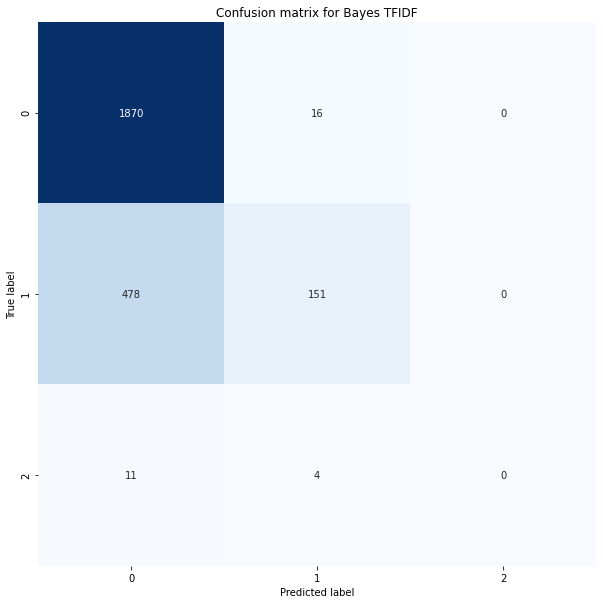

In [10]:
# Bayes

bayes = Modeling(MultinomialNB(), 
                 data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
                 'Bayes TFIDF')
bayes.fit_predict()
bayes.print_results()
bayes.plot_confusion_matrix()
result = bayes.add_to_table()

Results for Bayes SMOTE TFIDF:
Bayes SMOTE TFIDF accuracy: 0.7628
Bayes SMOTE TFIDF f-score: 0.7291
Bayes SMOTE TFIDF recall: 0.7628


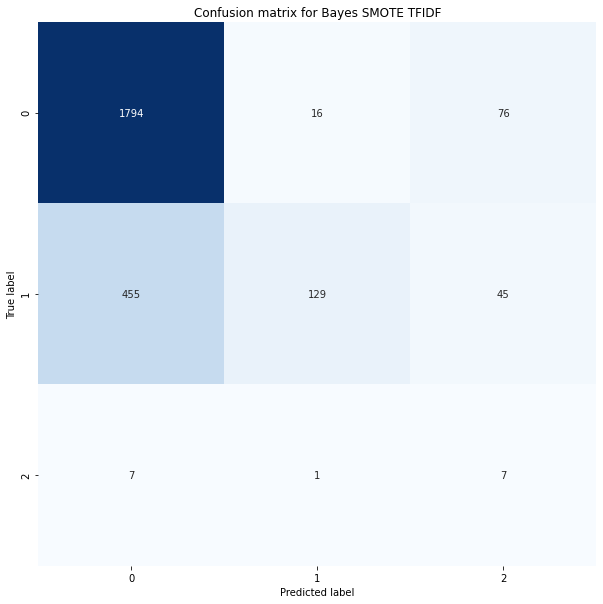

In [11]:
# SMOTE for Bayes

bayes_smote = Modeling(MultinomialNB(), 
                       data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
                       'Bayes SMOTE TFIDF')
bayes_smote.sample(SMOTE(sampling_strategy='minority'))
bayes_smote.fit_predict()
bayes_smote.print_results()
bayes_smote.plot_confusion_matrix()
result = bayes_smote.add_to_table()

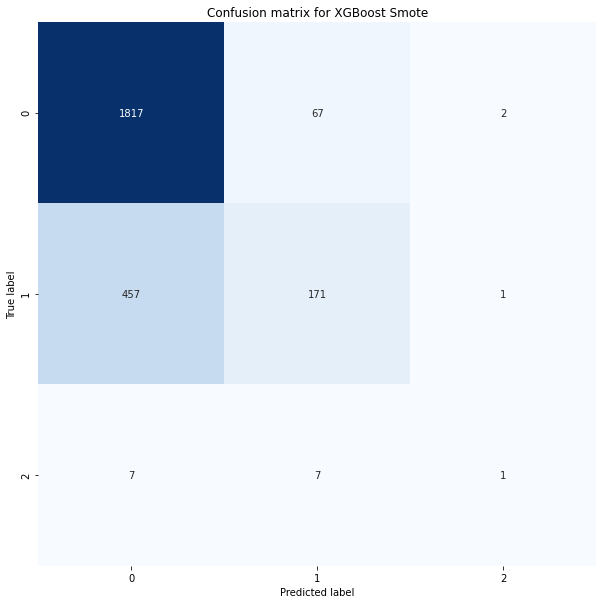

In [12]:
# XGBoost

y_pred = XG_boost_smote(data.X_train_tfidf, data.y_train, data.X_val_cv, data.y_val)
result = add_to_table_xgboost(data.y_val,
                              y_pred,
                              result,
                              'XGBoost Smote TFIDF')
plot_confusion_matrix(data.y_val, y_pred, 'XGBoost Smote')

### Count Vectorizer

In [13]:
# Random Forest

rf_cv = Modeling(RandomForestClassifier(n_estimators=1000, random_state=0), 
              data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
              'Random Forest CV')
rf_cv.fit_predict()
rf_cv.print_results()
result = rf_cv.add_to_table()

Results for Random Forest CV:
Random Forest CV accuracy: 0.836
Random Forest CV f-score: 0.8197
Random Forest CV recall: 0.836


Results for Logistic Regression CV:
Logistic Regression CV accuracy: 0.8435
Logistic Regression CV f-score: 0.8299
Logistic Regression CV recall: 0.8435


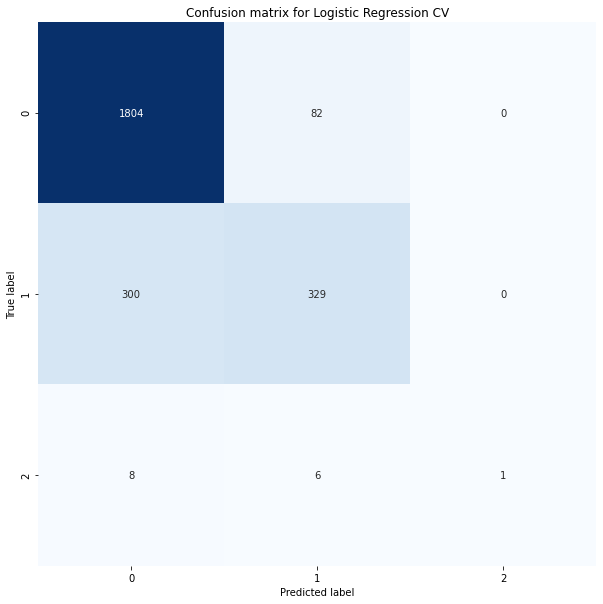

In [14]:
# Logistic Regression

log_reg_cv = Modeling(LogisticRegression(solver='newton-cg'), 
                   data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
                   'Logistic Regression CV')
log_reg_cv.fit_predict()
log_reg_cv.print_results()
log_reg_cv.plot_confusion_matrix()
result = log_reg_cv.add_to_table()

Results for Logistic Regression SMOTE CV:
Logistic Regression SMOTE CV accuracy: 0.7292
Logistic Regression SMOTE CV f-score: 0.7771
Logistic Regression SMOTE CV recall: 0.7292


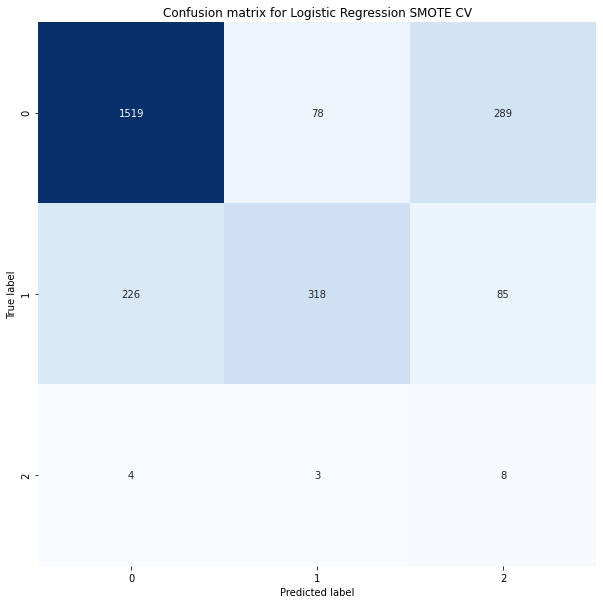

In [15]:
# SMOTE for Logistic Regression

log_reg_smote_cv = Modeling(LogisticRegression(solver='newton-cg'), 
                         data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
                         'Logistic Regression SMOTE CV')
log_reg_smote_cv.sample(SMOTE(sampling_strategy='minority'))
log_reg_smote_cv.fit_predict()
log_reg_smote_cv.print_results()
log_reg_smote_cv.plot_confusion_matrix()
result = log_reg_smote_cv.add_to_table()

Results for SVC CV:
SVC CV accuracy: 0.8273
SVC CV f-score: 0.8008
SVC CV recall: 0.8273


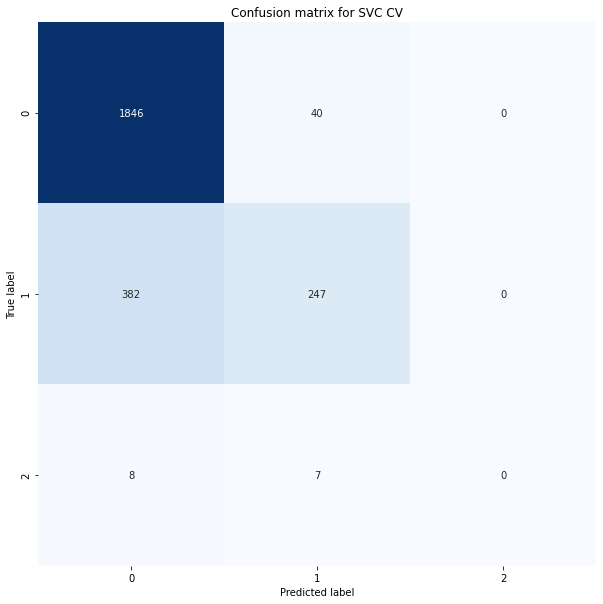

In [16]:
# SVC

svc_cv = Modeling(SVC(probability=True), 
               data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
               'SVC CV')
svc_cv.fit_predict()
svc_cv.print_results()
svc_cv.plot_confusion_matrix()
result = svc_cv.add_to_table()

Results for SVC SMOTE CV:
SVC SMOTE CV accuracy: 0.7874
SVC SMOTE CV f-score: 0.7438
SVC SMOTE CV recall: 0.7874


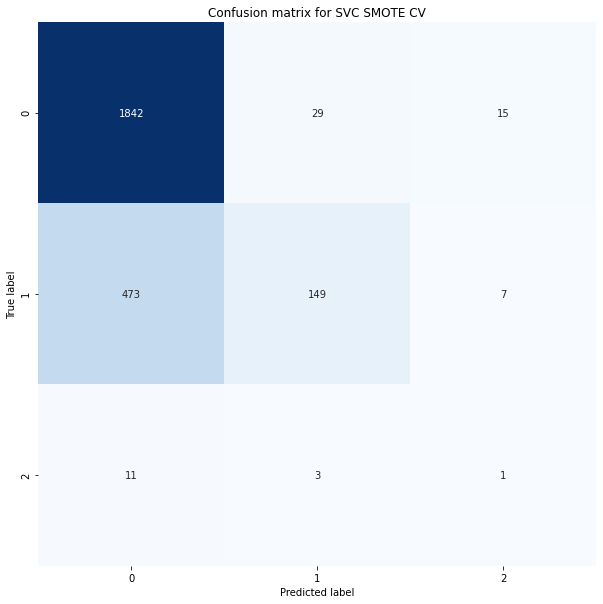

In [17]:
# SMOTE for SVC

svc_smote_cv = Modeling(SVC(probability=True), 
                     data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
                     'SVC SMOTE CV')
svc_smote_cv.sample(SMOTE(sampling_strategy='minority'))
svc_smote_cv.fit_predict()
svc_smote_cv.print_results()
svc_smote_cv.plot_confusion_matrix()
result = svc_smote_cv.add_to_table()

Results for Bayes CV:
Bayes CV accuracy: 0.8443
Bayes CV f-score: 0.8391
Bayes CV recall: 0.8443


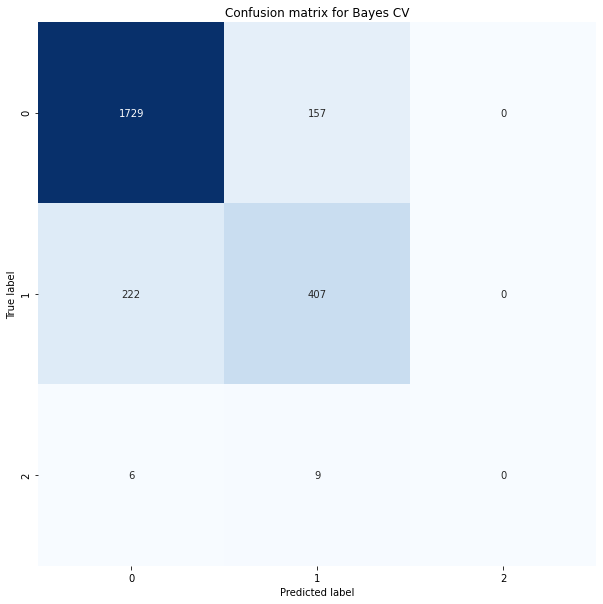

In [18]:
# Bayes

bayes_cv = Modeling(MultinomialNB(), 
                 data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
                 'Bayes CV')
bayes_cv.fit_predict()
bayes_cv.print_results()
bayes_cv.plot_confusion_matrix()
result = bayes_cv.add_to_table()

Results for Bayes SMOTE CV:
Bayes SMOTE CV accuracy: 0.8206
Bayes SMOTE CV f-score: 0.8325
Bayes SMOTE CV recall: 0.8206


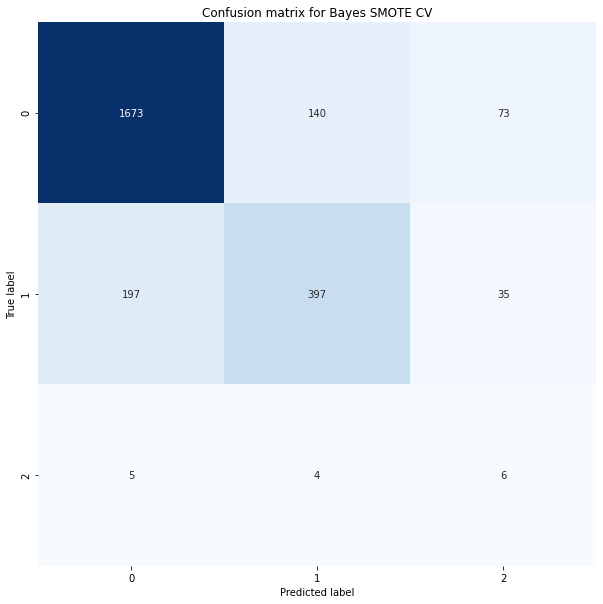

In [19]:
# SMOTE for Bayes

bayes_smote_cv = Modeling(MultinomialNB(), 
                       data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
                       'Bayes SMOTE CV')
bayes_smote_cv.sample(SMOTE(sampling_strategy='minority'))
bayes_smote_cv.fit_predict()
bayes_smote_cv.print_results()
bayes_smote_cv.plot_confusion_matrix()
result = bayes_smote_cv.add_to_table()

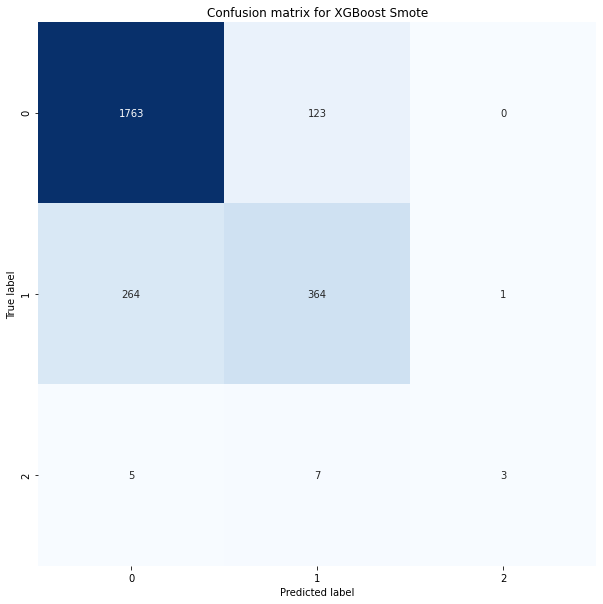

In [20]:
# XGBoost

y_pred = XG_boost_smote(data.X_train_cv, data.y_train, data.X_val_cv, data.y_val)
result = add_to_table_xgboost(data.y_val,
                              y_pred,
                              result,
                              'XGBoost Smote CV')
plot_confusion_matrix(data.y_val, y_pred, 'XGBoost Smote')

### Gensim for the best model

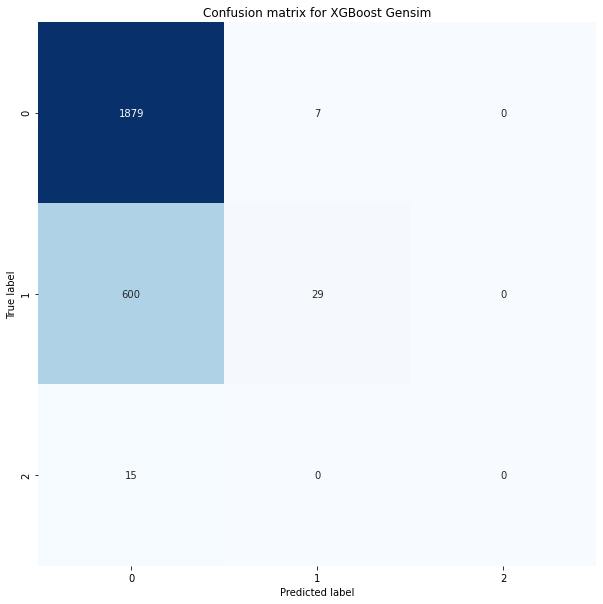

In [21]:
y_pred_g = XG_boost_gensim(data.X_train, data.X_val, data.y_train)
result = add_to_table_xgboost(data.y_val,
                              y_pred_g,
                              result,
                              'XGBoost Gensim')
plot_confusion_matrix(data.y_val, y_pred_g, 'XGBoost Gensim')

In [64]:
result.transpose().sort_values(by='F-score', ascending=False)

AttributeError: 'str' object has no attribute 'transpose'

In [4]:
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data import DataLoader
import torch.nn as nn

In [5]:
data.sparse_to_tensor(data.X_train_cv, data.X_val_cv, data.X_test_cv)

In [6]:
train_data = TensorDataset(data.X_train_tensor, data.y_train_tensor)
train_loader = DataLoader(train_data,batch_size=16, shuffle=True)

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [6]:
import spacy
import torchtext
from torchtext.legacy import data
import re

In [7]:
def simple_tokinizer(text):
    """ Simple tokenizer
    """
    return text.split()

LABEL = data.LabelField(dtype = torch.long)
TEXT = data.Field(tokenize=simple_tokinizer, include_lengths = True)
fields = [('text', TEXT), ('label', LABEL)]

twitterDataset = torchtext.legacy.data.TabularDataset(
        path="cleaned_data.csv", 
        format="CSV", 
        fields=fields,
        skip_header=True)



train_data, valid_data, test_data = twitterDataset.split(split_ratio=[0.7,0.15,0.15])

vocab_size = 400000
TEXT.build_vocab(train_data, max_size=vocab_size)

LABEL.build_vocab(train_data)

BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE,
    sort_within_batch = True,
    sort_key = lambda x: len(x.text))

import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, 
                 bidirectional, dropout, pad_idx):

        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)

        self.rnn = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout)

        self.fc = nn.Linear(hidden_dim * 2, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, text, text_lengths):

        #text = [sent len, batch size]

        embedded = self.dropout(self.embedding(text))

        #embedded = [sent len, batch size, emb dim]

        #pack sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths)

        packed_output, (hidden, cell) = self.rnn(packed_embedded)

        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors

        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]

        #concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        #and apply dropout

        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))

        #hidden = [batch size, hid dim * num directions]

        return self.fc(hidden)    

INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 3 ### changed from previous value (1)
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = RNN(INPUT_DIM, 
            EMBEDDING_DIM, 
            HIDDEN_DIM, 
            OUTPUT_DIM, 
            N_LAYERS, 
            BIDIRECTIONAL, 
            DROPOUT, 
            PAD_IDX)

import torch.optim as optim
optimizer = optim.Adam(model.parameters())


criterion = nn.CrossEntropyLoss() # Previously: criterion = nn.BCEWithLogitsLoss()
model = model.to(device)
criterion = criterion.to(device)

def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
#     print(preds)
#     print('------------')
#     print(y)
    _, preds = torch.max(preds, 1)
    y_pred = preds.detach().cpu().numpy()
    y = y.detach().cpu().numpy()
    acc = accuracy_score(y, y_pred)
    return acc

def train(model, iterator, optimizer, criterion):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for batch in iterator:

        optimizer.zero_grad()

        text, text_lengths = batch.text

        predictions = model(text, text_lengths).squeeze(1)

        loss = criterion(predictions, batch.label)

        acc = binary_accuracy(predictions, batch.label)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for batch in iterator:

            text, text_lengths = batch.text

            predictions = model(text, text_lengths).squeeze(1)

            loss = criterion(predictions, batch.label)

            acc = binary_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [22]:
start = time.time()
def simple_tokinizer(text):
    """ Simple tokenizer
    """
    return text.split()

LABEL = data.LabelField()
TEXT = data.Field(tokenize=simple_tokinizer)
fields = [('Comment', TEXT), ('Kind', LABEL)]

twitterDataset = torchtext.legacy.data.TabularDataset(
        path="cleaned_data.csv", 
        format="CSV", 
        fields=fields,
        skip_header=False)
end = time.time()
print(end - start)

0.001981496810913086


In [8]:
N_EPOCHS = 10

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 1m 25s
	Train Loss: 0.633 | Train Acc: 73.31%
	 Val. Loss: 0.551 |  Val. Acc: 75.02%
Epoch: 02 | Epoch Time: 1m 27s
	Train Loss: 0.545 | Train Acc: 75.53%
	 Val. Loss: 0.495 |  Val. Acc: 79.25%
Epoch: 03 | Epoch Time: 1m 28s
	Train Loss: 0.489 | Train Acc: 78.64%
	 Val. Loss: 0.456 |  Val. Acc: 81.77%
Epoch: 04 | Epoch Time: 1m 26s
	Train Loss: 0.430 | Train Acc: 81.42%
	 Val. Loss: 0.430 |  Val. Acc: 83.23%
Epoch: 05 | Epoch Time: 1m 30s
	Train Loss: 0.390 | Train Acc: 83.18%
	 Val. Loss: 0.426 |  Val. Acc: 83.36%
Epoch: 06 | Epoch Time: 1m 27s
	Train Loss: 0.355 | Train Acc: 84.91%
	 Val. Loss: 0.428 |  Val. Acc: 83.83%
Epoch: 07 | Epoch Time: 1m 33s
	Train Loss: 0.323 | Train Acc: 86.62%
	 Val. Loss: 0.433 |  Val. Acc: 83.96%
Epoch: 08 | Epoch Time: 1m 12s
	Train Loss: 0.302 | Train Acc: 87.49%
	 Val. Loss: 0.431 |  Val. Acc: 84.25%
Epoch: 09 | Epoch Time: 1m 16s
	Train Loss: 0.274 | Train Acc: 88.84%
	 Val. Loss: 0.448 |  Val. Acc: 83.86%
Epoch: 10 | Epoch T

In [7]:
train, valid, test = twitterDataset.split(split_ratio=[0.7,0.15,0.15])

(len(train),len(test),len(valid))

(104, 22, 22)

In [9]:
print(vars(train.examples[1]))

{'Comment': ['widzieć', 'kibic', 'widzewa', 'szczęście', 'trwać', 'mundial', 'dzięki', 'to', 'ogólnopolski', 'szczery', 'argentyny', 'messiego'], 'Kind': '0'}


In [19]:
def predict_sentiment(model, sentence):
    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    length = [len(indexed)]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(1)
    length_tensor = torch.LongTensor(length)
    _, prediction = torch.max(model(tensor, length_tensor), axis=1)
    return prediction.item()

In [20]:
prediction = torch.sigmoid(model(tensor, length_tensor))

NameError: name 'tensor' is not defined

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
  'Ala mieć aligator.',
     'Ala nie mieć aligator ale mieć pies',
    'Michał mieć pies']
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(corpus).todense()
# print(vectorizer.get_feature_names())

matrix([[0.61980538, 0.        , 0.61980538, 0.        , 0.48133417,
         0.        , 0.        ],
        [0.33576371, 0.44148893, 0.33576371, 0.        , 0.52150095,
         0.44148893, 0.33576371],
        [0.        , 0.        , 0.        , 0.72033345, 0.42544054,
         0.        , 0.54783215]])

C:\Users\kotul\anaconda3\envs\praca37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  This is separate from the ipykernel package so we can avoid doing imports until


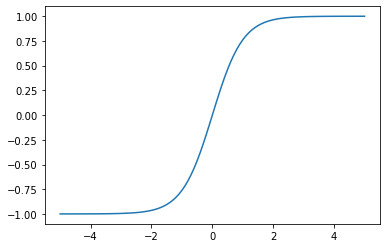

In [18]:
import torch
import matplotlib.pyplot as plt
x = torch.range(-5., 5., 0.1)
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

C:\Users\kotul\anaconda3\envs\praca37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  after removing the cwd from sys.path.


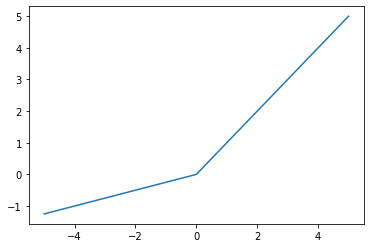

In [17]:
import torch
import matplotlib.pyplot as plt
prelu = torch.nn.PReLU(num_parameters=1)
x = torch.range(-5., 5., 0.1)
y = prelu(x)
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()